# Econ 581
# Bill Polley
# Notes on Mathematical Economics

## Optimization
Our task in economics is often to determine the maximum or minimum of some function, usually under some constraints. We refer to that function as an "objective" function. The variables we get to choose are variously called choice, decision, policy, or control variables. In this section, we will consider how to set up and solve a variety of problems of this type.

Let's first import the usual packages and define our custom plotting function, econplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def econplot(x,series,x_min,x_max,y_min,y_max,chart_title,chart_x,chart_y):
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    ax = fig.add_axes([0,0,1,1])
    ax.axis([x_min,x_max,y_min,y_max])
    if np.ndim(series)==1:
        ax.plot(x,series)
    else:
        for y in series:
            ax.plot(x,y)
    ax.set_xlabel(chart_x,size=16)     
    ax.set_ylabel(chart_y,size=16)    
    ax.set_title(chart_title,size=24)
    ax.tick_params(which='both',labelsize=16)
    return fig,ax

We will first see how to find a local maximum of a function. First, define a function and plot it.

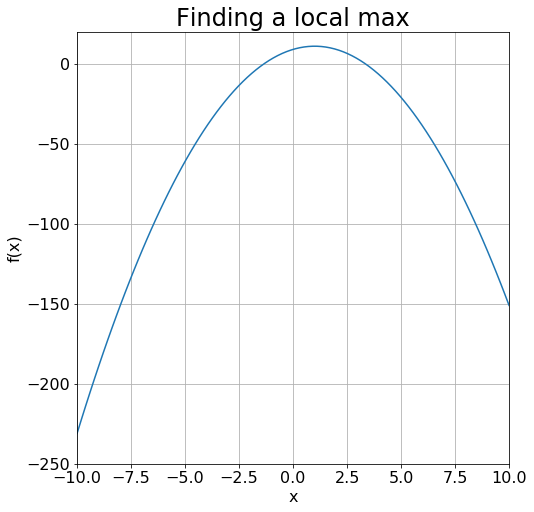

In [3]:
def f(x):
    return -2*x**2+4*x+9
x=np.linspace(-10,10,100)
fig,ax=econplot(x,f(x),-10,10,-250,20,'Finding a local max','x','f(x)')
ax.grid()
plt.show()

The local maximum or minimum is a value of $x$ at which the derivative of $f(x)$ is equal to zero. The global maximum (minimum) is the highest (lowest) local maximum (minimum). It is sometimes difficult to determine a global maximum for an arbitrary function since we may not know the behavior of the function everywhere. However, for polynomial functions, we can generally determine the maximum number of local maxima (minima) and therefore finding a global maximum (minimum) is a finite problem.

In this case since we know we are dealing with a quadratic function, there is only one local extremum (extremum is a word that encompasses both maximum and minimum), and thus it is the global extremum.

The condition that the derivative, $f'(x) = 0$ is referred to as the *first order condition* or FOC. "First order" because it is the first derivatiave.

NumPy has a class for polynomial functions making it extremely easy to do calculations with them.

In [47]:
import numpy.polynomial.polynomial as poly
coeff=(9,4,-2) #coefficients of the polynomial in ascending order
p=poly.Polynomial(coeff,domain=[-10,10],window=[-10,10])
dp_dx=p.deriv  #creates a polynomial object as the derivative of the polynomial with the given coeff
print(dp_dx(1))
sol=(dp_dx(1).roots())  #print the roots of the derivative
print(sol)

poly([ 4. -4.])
[1.]


This could also be accomplished with `np.roots()` as we saw in the first set of notes. However, the method here is a good example of object oriented programming (OOP). If you have a number of objects of a certain class (e.g. polynomials), it may be advantageous to use these methods. As is often the case in programming, there is more than one way to do the job. See [Sargent and Stachurski](https://python-programming.quantecon.org/oop_intro.html) for more on the advantages of OOP in economic analysis.


In the example above, we can see that the local extremum is at $x = 1$. However, solving the FOC is not enough to determine whether this a minimum or maximum. For that, we need to take the 2nd derivative and evaluate it at the extremum.

In [48]:
d2p_dx2=poly.polyder(coeff,m=2) #m is the number of times to differentiate
print(poly.Polynomial(d2p_dx2)(1)) #create a polynomial object and evaluate at x=1

-4.0


We have confirmed that the 2nd derivative is negative at the extremum. Therefore, $x = 1$ is a local maximum. The function is concave at $x = 1$.

Let's try it with a cubic function, $x^3 - 3x + 5$

In [49]:
coeff=(5,-3,0,1)
p=poly.Polynomial(coeff,domain=[-10,10],window=[-10,10])
dp_dx=p.deriv  #creates a polynomial object as the derivative of the polynomial with the given coeff
print(dp_dx(1))
sol=(dp_dx(1).roots())  #print the roots of the derivative
print(sol)
d2p_dx2=poly.polyder(coeff,m=2)
for i in sol:
    print(poly.Polynomial(d2p_dx2)(i))

poly([-3.  0.  3.])
[-1.  1.]
-6.0
6.0


From the output of this code, we determine that the first derivative is $3x^2 - 3$, the roots are at $x = -1$ and $x = 1$, and the function is concave at $x = -1$ (local max) and convex at $x = 1$ (local min).

Plot the function to confirm this.

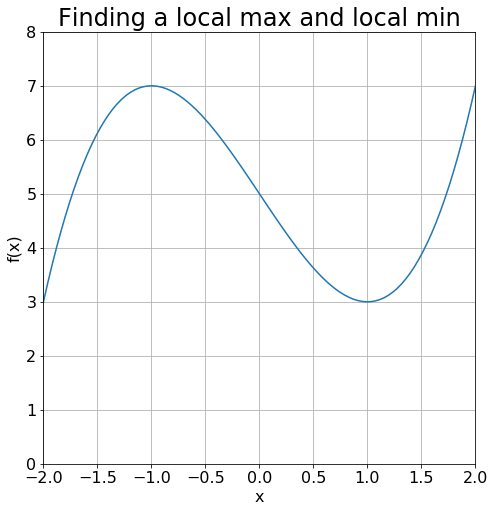

In [50]:
def f(x):
    return x**3-3*x+5
x=np.linspace(-2,2,100)
fig,ax=econplot(x,f(x),-2,2,0,8,'Finding a local max and local min','x','f(x)')
ax.grid()
plt.show()

The plot confirms our calculations.

## Simple Economic Example: Profit Maximization in One Variable
In this exercise, we will see how to use the first order condition to solve for the profit maximizing quantity for a simple firm. The production function will be Cobb-Douglas.

$$f(L) = L^a$$
where $$0 < a < 1$$

Labor ($L$) is the only choice variable. We also define the wage to be $w$, and the price of output to be $p$. Thus the profit function is:

Profit $= p f(L) - w L$

The goal is to maximize profit. So we take the derivative of the profit function and set it equal to zero, then solve for $L$. Then we should test the 2nd derivative at that point to ensure that it is negative so that our local extremum is a maximum.

Solving by hand, you find that the first order condition is:

$$a p L^{a-1} - w = 0$$

$$L = ((a p)/w)^{1/(1-a)}$$

The second derivative of the profit function is $(a - 1)a p L^{a-2}$ which is negative if $0 < a < 1$.

In economic terms, the solution for $L$ is the labor demand curve (which you can show to be decreasing in $w$). If you substitute the optimal $L$ into the production function, you obtain the firm's individual supply curve. If you substitute the optimal $L$ into the profit function, you obtain the optimal profit. This completely characterizes the solution to the problem.

Now let's see how we can use Python to solve this problem. We will use the package SymPy to allow us to do symbolic computation. Please note that symbolic manipulation is not Python's best strength. More frequently, we would like to implement solutions numerically for problems that cannot be solved by hand like the one above. But there are times when you might want the computer to take a derivative symbolically. So it is nice to know how the SymPy package works. This also gives us a little more experience working with different packages.

The first thing we need to do is import the relevant functions from SymPy and declare the variables we want to treat as symbols.

In [51]:
from sympy import symbols,log,diff,solve,lambdify

L,a,p,w = symbols('L a p w')
# symbols is a SymPy function that will treat these variables symbolically

def production(L,a):
    return L**a

def profit(L,w,p):
    return p*production(L,a)-w*L

def foc(L,w,p):
    return diff(profit(L,w,p),L)

In [52]:
print(foc(L,w,p))
sol=solve(foc(L,w,p),L)
print(sol)

-w + L**a*a*p/L
[(a*p/w)**(-1/(a - 1))]


We confirm that this matches the result that we obtained by hand.

Having solved for the solution analytically, we may now want to work with it numerically. Fortunately there is a straightforward way to convert the results from SymPy back to NumPy variables and arrays. Note that the results from SymPy are not floating point variables.

In [53]:
type(sol[0])

sympy.core.power.Pow

I'll talk more about this in class. Suffice to say that one must be careful in Python to make sure your variable is the correct type before passing it to a function or method. If you have the wrong type, errors are likely to result.

Here is one way to convert the result back to something NumPy can use.

In [54]:
x=np.linspace(.1,10,100) #define a space
def lab(L,w,p_,a_):
    params=[(a,a_),(p,p_)]
    return sol[0].subs(params)-L
#take our solution, pass parameters to it, and return as an expression
#that we can set equal to zero
labor_demand=lambdify(w,solve(lab(L,w,1,.5),L),"numpy")
#lambdify is a SymPy function that can convert our solution to a NumPy datatype
labor_demand=labor_demand(x)[0]
#evaluate over the space, x
print(labor_demand)

[2.50000000e+01 6.25000000e+00 2.77777778e+00 1.56250000e+00
 1.00000000e+00 6.94444444e-01 5.10204082e-01 3.90625000e-01
 3.08641975e-01 2.50000000e-01 2.06611570e-01 1.73611111e-01
 1.47928994e-01 1.27551020e-01 1.11111111e-01 9.76562500e-02
 8.65051903e-02 7.71604938e-02 6.92520776e-02 6.25000000e-02
 5.66893424e-02 5.16528926e-02 4.72589792e-02 4.34027778e-02
 4.00000000e-02 3.69822485e-02 3.42935528e-02 3.18877551e-02
 2.97265161e-02 2.77777778e-02 2.60145682e-02 2.44140625e-02
 2.29568411e-02 2.16262976e-02 2.04081633e-02 1.92901235e-02
 1.82615047e-02 1.73130194e-02 1.64365549e-02 1.56250000e-02
 1.48720999e-02 1.41723356e-02 1.35208221e-02 1.29132231e-02
 1.23456790e-02 1.18147448e-02 1.13173382e-02 1.08506944e-02
 1.04123282e-02 1.00000000e-02 9.61168781e-03 9.24556213e-03
 8.89996440e-03 8.57338820e-03 8.26446281e-03 7.97193878e-03
 7.69467528e-03 7.43162901e-03 7.18184430e-03 6.94444444e-03
 6.71862403e-03 6.50364204e-03 6.29881582e-03 6.10351562e-03
 5.91715976e-03 5.739210

We now have a labor demand curve defined for the parameters $p = 1$ and $a = 0.5$. Graph using econplot.

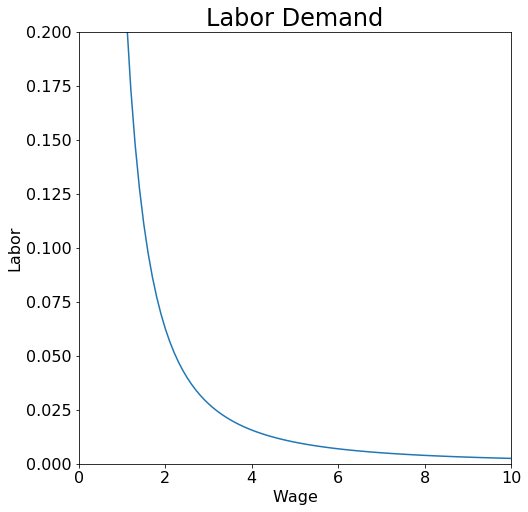

In [55]:
fig,ax=econplot(x,labor_demand,0,10,0,.2,'Labor Demand','Wage','Labor')
plt.show()

Of course, if we want to show it as an inverse demand curve, we can do that too.

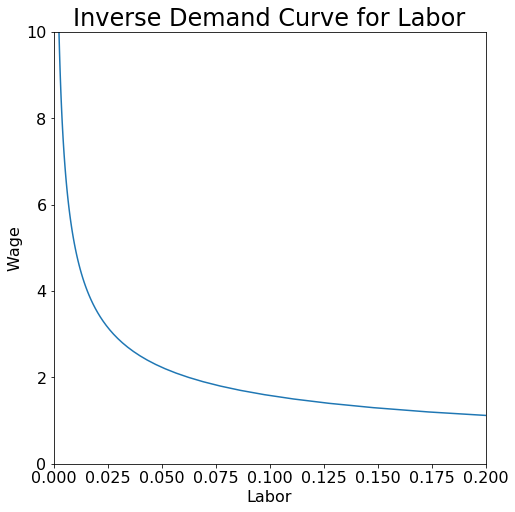

In [56]:
fig,ax=econplot(labor_demand,x,0,.2,0,10,'Inverse Demand Curve for Labor','Labor','Wage')
plt.show()

This is a good example to showcase MatplotLib's ability to generate 3D plots. Let's add an axis for "$a$," the Cobb-Douglas parameter (exponent) on the production function.

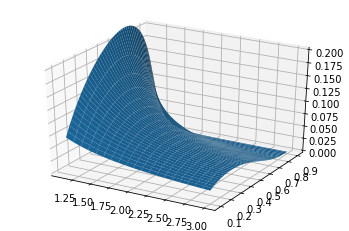

In [57]:
from mpl_toolkits.mplot3d import Axes3D

def lab(L,w,p_,a):
    params=[(p,p_)]
    return sol[0].subs(params)-L
#take our solution, pass parameters to it, and return as an expression
#that we can set equal to zero
x=np.linspace(1.1,3,20)
A=np.linspace(.1,.9,90)
x,A=np.meshgrid(x,A)
labor_demand=lambdify([w,a],solve(lab(L,w,1,a),L),"numpy")
#lambdify is a SymPy function that can convert our solution to a NumPy datatype
labor_demand=labor_demand(x,A)[0]
#evaluate over the space, x

#define the fig,ax for a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the surface.
surf = ax.plot_surface(x,A,labor_demand)
ax.set_zlim(0,.2)
plt.show()

You can explore the documentation for [mplot3d](https://matplotlib.org/3.2.2/api/toolkits/mplot3d.html?highlight=3d#module-mpl_toolkits.mplot3d) if you are interested in 3D plots. We will not be using them extensively, but they can be useful in situations where you have two important parameters of interest.

## Optimizing Over More Than One Variable: The Lagrange Method
We now examine a typical economic example that would be commonly found in a graduate microeconomics text--maximization of a logarithmic utility function with two goods.

$$\max_{x_1,x_2} U(x_1,x_2) = a \log(x_1) + (1-a) \log (x_2)$$

subject to: $$w - p_1 x_1 - p_2 x_2 = 0$$

Please refer to a math econ textbook for a detailed treatment of the Lagrangian function. In class, I will explain the Lagrangian in detail. We will discuss how to solve such problems by hand. In modern economic research,  however, you will seldom have need to solve problems by hand. Problems that are possible to solve analytically are not very realistic. Problems that are realistic will likely need to be solved numerically on the computer. Of course, you might need to solve some of these by hand in a graduate level micro course, so it is important to know how.

For this problem, the Lagrangian is:

$$a \log(x_1) + (1-a) \log (x_2) + \lambda(w - p_1 x_1 - p_2 x_2)$$

Using the package SymPy, we can solve this in Python. Import the package and define some functions.

In [58]:
from sympy import symbols,log,diff,solve,lambdify

x1,x2,a,w,p1,p2,lam = symbols('x1 x2 a w p1 p2 lam')
# symbols is a SymPy function that will treat these variables symbolically

def utility(x1,x2,a):
    return a*log(x1)+(1-a)*log(x2)
# we use the log function from SymPy instead of from NumPy

def num_utility(x_1,x_2,a):
    return a*np.log(x_1)+(1-a)*np.log(x_2)

def budget(x1,x2,w,p1,p2):
    return w-p1*x1-p2*x2

def lagrangian(x1,x2,a,w,p1,p2,lam):
    return utility(x1,x2,a)+lam*budget(x1,x2,w,p1,p2)

def foc1(x1,x2,a,w,p1,p2,lam):
    return diff(lagrangian(x1,x2,a,w,p1,p2,lam),x1)

def foc2(x1,x2,a,w,p1,p2,lam):
    return(diff(lagrangian(x1,x2,a,w,p1,p2,lam),x2))

We now have functional (and symbolic) representations of utility, the budget constraint, the Lagrangian, and the first order conditions.

Show the first order conditions.

In [59]:
print(foc1(x1,x2,a,w,p1,p2,lam))
print(foc2(x1,x2,a,w,p1,p2,lam))

a/x1 - lam*p1
-lam*p2 + (1 - a)/x2


The first order condition with respect to x_1 is $$a/x_1 - \lambda(p_1) = 0.$$

The first order condition with respect to x_2 is $$-\lambda(p_2) + (1 - a)/x_2 = 0.$$

We can now use the SymPy function solve to solve the system of three equations: the two FOCs and the budget constraint.

In [60]:
sol=solve([foc1(x1,x2,a,w,p1,p2,lam),
           foc2(x1,x2,a,w,p1,p2,lam),
           budget(x1,x2,w,p1,p2)],
          x1,x2,lam)
print(sol)

[(a*w/p1, -w*(a - 1)/p2, 1/w)]


So $x_1 = a(w)/p_1, x_2 = (1-a)w/p_2$, and $\lambda = 1/w$.

Now we can define a list of parameters (call it "params") and evaluate the solution at those parameters.

In [61]:
params=[(a,.5),(w,5),(p1,1),(p2,1)]
x_star=np.linspace(0,2,3)
for i in range(len(sol[0])):
    x_star[i]=sol[0][i].subs(params)
    print(sol[0][i].subs(params))
u_star=utility(x1,x2,a).subs(params).subs([(x1,x_star[0]),(x2,x_star[1])])
print(u_star)

2.50000000000000
2.50000000000000
1/5
0.916290731874155


We have $x1 = x2 = 2.5$ as the solution for these parameters.

Just for fun, let's create an interactive graph that illustrates what the optimum looks like graphically. We can create interactive sliders that allow us to vary the values of the parameters. Don't worry about trying to understand this code on your own. (If you can, great!) I will go over it in class.

In [62]:
import ipywidgets as widgets
%matplotlib inline

x=np.linspace(.1,4.9,49)
y=np.linspace(.1,4.9,49)

def g(a1,p1_,p2_,wealth):
    params=[(a,a1),(w,wealth),(p1,p1_),(p2,p2_)]
    x_star=np.linspace(0,2,3)
    for i in range(len(sol[0])):
        x_star[i]=sol[0][i].subs(params)
    u_star=utility(x1,x2,a1).subs([(x1,x_star[0]),(x2,x_star[1])])
    b=lambdify(x1,solve(budget(x1,x2,wealth,p1_,p2_),x2),"numpy")
    b=b(x)[0]
    fig,ax=econplot(x,b,0,5,0,5,'Utility Maximization','x1','x2')
    X, Y = np.meshgrid(x, y)
    util=num_utility(X,Y,a1)
    U=ax.contour(X,Y,util,[u_star])
    plt.show()
    
interactive_plot = widgets.interactive(g,
                                       a1=widgets.FloatSlider(value=.5,min=.05,max=.95,step=.05,description='a'),
                                       p1_=widgets.FloatSlider(value=1,min=.1,max=2,step=.1,description='p1'),
                                       p2_=widgets.FloatSlider(value=1,min=.1,max=2,step=.1,description='p2'),
                                       wealth=widgets.FloatSlider(value=5,min=1,max=10,step=.5,description='wealth')
                                      )
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='a', max=0.95, min=0.05, step=0.05), FloatSlider(valu…

Let's do another example, this time on the production side. The firm must minimize cost subject to an output constraint. We redefine the functions to reflect this. In class, I will give more explanations.

In [63]:
from sympy import symbols,log,diff,solve,lambdify
import numpy as np
r,w,k,l,q,lam = symbols('r w k l q lam')
# symbols is a SymPy function that will treat these variables symbolically

def cost(r,w,k,l):
    return r*k+w*l

def output(q,k,l):
    return q-(k**.5)-(l**.5)

def lagrangian(r,w,k,l,q,lam):
    return cost(r,w,k,l)+lam*output(q,k,l)

def foc1(r,w,k,l,q,lam):
    return diff(lagrangian(r,w,k,l,q,lam),k)

def foc2(r,w,k,l,q,lam):
    return(diff(lagrangian(r,w,k,l,q,lam),l))

In [64]:
print(foc1(r,w,k,l,q,lam))
print(foc2(r,w,k,l,q,lam))
sol=solve([foc1(r,w,k,l,q,lam),
           foc2(r,w,k,l,q,lam),
           output(q,k,l)],
          k,l,lam)
print(sol)

-0.5*k**(-0.5)*lam + r
-0.5*l**(-0.5)*lam + w
[(q**2*w**2/(r - w)**2, q**2*r**2/(r - w)**2, -2.0*q*r*w/(r - w)), (q**2*w**2/(r - w)**2, q**2*r**2/(r - w)**2, 2.0*q*r*w/(r - w))]


SymPy's solve function identifies two solutions. The only difference between them is that the solution for $\lambda$ is of opposite sign. What we know about the Lagrange method tells us that $\lambda$ should be positive. This would suggest that the solution depends on whether $r$ or $w$ is greater.

We should be suspicious of these solutions. SymPy's [documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=solve#module-sympy.solvers) points out that some solutions to radical equations will be missed unless the option `check=False` is included when calling the solve funtion.

In [65]:
sol=solve([foc1(r,w,k,l,q,lam),
           foc2(r,w,k,l,q,lam),
           output(q,k,l)],
          k,l,lam,check=False)
print(sol)

[(q**2*w**2/(r - w)**2, q**2*r**2/(r - w)**2, -2.0*q*r*w/(r - w)), (q**2*w**2/(r - w)**2, q**2*r**2/(r - w)**2, 2.0*q*r*w/(r - w)), (q**2*w**2/(r + w)**2, q**2*r**2/(r + w)**2, -2.0*q*r*w/(r + w)), (q**2*w**2/(r + w)**2, q**2*r**2/(r + w)**2, 2.0*q*r*w/(r + w))]


We can easily verify that the last solution given is the correct one, yielding all positive values for any positive values of the parameters. As an exercise, you should check it by hand.

One more example: a consumption/leisure choice model. This particular example is taken from Steve Williamson's intermediate macro text. This is the problem to find the Pareto optimal allocations. Utility is log and additively separable in consumption $(c)$ and leisure $(l)$. The time endowment is 1, and the labor productivity parameter is $z$. Thus, the resource constraint is $z(1 - l) - c = 0$.

Again, we simply redefine the functions.

In [66]:
from sympy import symbols,log,diff,solve,lambdify
import numpy as np
c,leisure,z,lam = symbols('c leisure z lam')
# symbols is a SymPy function that will treat these variables symbolically

def utility(c, leisure):
    return log(c)+log(leisure)

def num_utility(c, leisure):
    return np.log(c)+np.log(leisure)

def resource(c, leisure, z):
    return z*(1-leisure)-c

def lagrangian(c,leisure,z,lam):
    return utility(c, leisure)+lam*resource(c,leisure,z)

def foc1(c,leisure,z,lam):
    return diff(lagrangian(c,leisure,z,lam),c)

def foc2(c,leisure,z,lam):
    return(diff(lagrangian(c,leisure,z,lam),leisure))

In [67]:
print(foc1(c,leisure,z,lam))
print(foc2(c,leisure,z,lam))
sol=solve([foc1(c,leisure,z,lam),
           foc2(c,leisure,z,lam),
           resource(c,leisure,z)],
          c,leisure,lam)
print(sol)

-lam + 1/c
-lam*z + 1/leisure
[(z/2, 1/2, 2/z)]


Therefore $c = z/2$, $l = 1/2$, and $\lambda = 2/z$.

Note that leisure is a constant in this model (i.e. is invariant to changes in $z$). This is because with log utility, the income and substitution effects cancel each other out. More on this later.

In [68]:
x=np.linspace(.01,.99,99)
y=np.linspace(.01,.99,99)

def g(z_):
    params=[(z,z_)]
    x_star=np.linspace(0,2,3)
    for i in range(len(sol[0])):
        x_star[i]=sol[0][i].subs(params)
    u_star=utility(c,leisure).subs([(c,x_star[0]),(leisure,x_star[1])])
    b=lambdify(c,solve(resource(c,leisure,z_),leisure),"numpy")
    b=b(x)[0]
    fig,ax=econplot(x,b,0,1,0,1,'Utility Maximization:\nWilliamson\'s Simple Macro Model','x1','x2')
    X, Y = np.meshgrid(x, y)
    util=num_utility(X,Y)
    U=ax.contour(X,Y,util,[u_star])
    plt.show()
    
interactive_plot = widgets.interactive(g,
                                       z_=widgets.FloatSlider(value=.5,min=.01,max=4.9,step=.1,description='z')
                                      )
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='z', max=4.9, min=0.01), Output()), _dom_classes=('wi…

You should now have a good handle on the basics of optimization in some common economic applications. Next, we will look at comparative statics.